# Task 1 - Detect the jupmp location in a noisy step function 

In [2]:
# import warnings
# warnings.filterwarnings("ignore")

import csv
import numpy as np
import pandas as pd
# import geopandas as gpd
from IPython.display import Image
# from shapely.geometry import Point, Polygon
from math import factorial
import scipy
import scipy.signal
import os, os.path

from datetime import date
import datetime
import time

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from patsy import cr

# from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb

import sys
import io

# to move files from one directory to another
import shutil


import yfinance as yf
from nasdaq_stock import nasdaq_stock as nasdaq_stock
import requests

from pylab import rcParams

# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('../')
import cycles_core as cc
import cycles_plot_core as cpc

# Set the plotting style

In [3]:
import matplotlib.pylab as pylab
size = 15
title_FontSize = 10
legend_FontSize = 8
tick_FontSize = 12
label_FontSize = 14

params = {'legend.fontsize': 'large',
          'figure.figsize': (6, 4),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size * 0.75,
          'ytick.labelsize': size * 0.75,
          'axes.titlepad': 10}


#
#  Once set, you cannot change them, unless restart the notebook
#
plt.rc('font', family = 'serif')
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['ytick.labelleft'] = False
plt.rcParams.update(params)
# pylab.rcParams.update(params)
plt.rc('text', usetex=True)

In [4]:
def find_jump(noisy_jump_vect):
    H = cc.create_upperTri_matrix_Ones(row_number = len(noisy_jump_vect))
    H_dot_Noise = np.dot(H, noisy_jump_vect)
    jump_idx = np.where(H_dot_Noise == np.amax(H_dot_Noise))[0][0]
    return (jump_idx)

True jump is [500] and the recovered one is [509]!


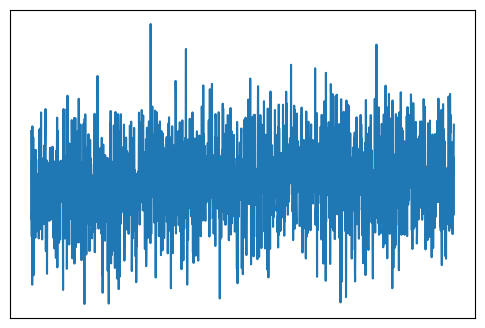

In [5]:
np.random.seed(seed=1) # seed=3 gives exact

#
# it does not work 100% accurately
#
true_jump = 500
noisy_signal = cc.create_noisy_stepFunc(dim = 2000, jump = true_jump, variance = 10)
plt.plot(noisy_signal);

recovered_jump = find_jump(noisy_signal)


# print('True jump is [{}] and the recovered one is [{}]!'.format(true_jump, recovered_jump))
print (f'True jump is [{true_jump}] and the recovered one is [{recovered_jump}]!')

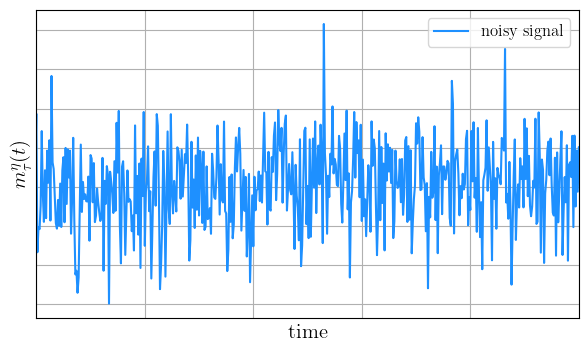

In [6]:
fig, ax = plt.subplots();
fig.set_size_inches(7, 4)

ax.plot(noisy_signal, c ='dodgerblue', label = 'noisy signal')

################################################
#
# Set labels and ticks
#
ax.set_xlabel('time') # , labelpad = 15);
ax.set_ylabel(r'$m_{\tau}^{\eta}(t)$'); # labelpad = 15
ax.tick_params(axis = 'y', which = 'major')
ax.tick_params(axis = 'x', which = 'major')
plt.xlim([300, 800])

ax.grid(True);
ax.legend(loc = "upper right");

plot_dir = "/Users/hn/Documents/00_GitHub/cyclesOrg_competition/01_cycles-discovery-metrics/figures/"
file_name = plot_dir + "low_dimen_signal.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False)



In [7]:
true_signal = cc.create_true_stepFunc(dim = 2000, jump = true_jump)
recovered_signal = cc.create_true_stepFunc(dim = 2000, jump = recovered_jump)

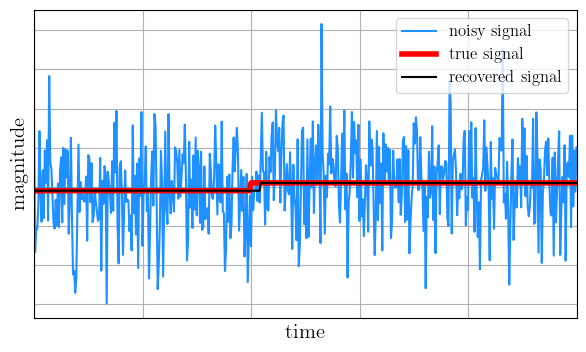

In [8]:
fig, ax = plt.subplots();
fig.set_size_inches(7, 4)

ax.plot(noisy_signal, c ='dodgerblue', label = 'noisy signal')

ax.plot(true_signal, c ='red', label = 'true signal', linewidth = 4)
ax.plot(recovered_signal, c ='black', label = 'recovered signal')


################################################
#
# Set labels and ticks
#
ax.set_xlabel('time'); # , labelpad = 15
ax.set_ylabel(r'magnitude'); # , labelpad = 15
ax.tick_params(axis = 'y', which = 'major')
ax.tick_params(axis = 'x', which = 'major')

plt.xlim([300, 800])

ax.grid(True);
ax.legend(loc = "upper right");

plot_dir = "/Users/hn/Documents/00_GitHub/cyclesOrg_competition/01_cycles-discovery-metrics/figures/"
os.makedirs(plot_dir, exist_ok=True)

file_name = plot_dir + "low_dimen_signalRecovered.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False)

